##Post2Caption

Adam Khakhar

akhakhar@wharton.upenn.edu



##Motivation

Image captioning has been researched intensely in the past 10 years. Recurrent neural models for image captioning usually employ an encoder-decoder framework with an attention mechanism. In most of the image captioning research, the dataset includes captions directly tied to images: the captions serve as a description or story of the image. However, in social media posts, it is common for captions to be styled as a joke or a statement, rather than a vanilla description of the image. In this paper, I intend to research applications and effectiveness of a recurrent neural model for image captioning where the caption is not necessarily a description of the image or the objects in the image. Rather, the caption can be ambiguous and can be thought of as a statement about how the user is feeling about the image.

A brief presentation can be found here: https://docs.google.com/presentation/d/16J8oW44pG7n-CusiPwQvyZusuT9xulGsvgZnto7TEAM/edit?usp=sharing



##Architecture and Hyperparameter Selection Summary

The goal of this model is to generate an Instagram styled caption for a given post (image). To accomplish this, I will use an encoder decoder combination of a Convolutional Neural Network and Recurrent Neural Network with attention. I will use a pretrained CNN (InceptionV3) to generate a vector for the image. I will feed this vector into the RNN with attention and Gated Recurrent Unit to generate a caption.

##Acknowledgements and References

This project was supported by the University of Pennsylvania School of Engineering and Applied Sciences, Computer Science Department: CIS 545: Big Data Analytics taught by Professor Zachary Ives, PhD. The works presented were compiled by Adam Khakhar. Some parts of the notebook include attributions to various papers from which Adam Khakhar has adapted, with some parts copied directly.
 

*   Justin Johnson, Andrej Karpathy, Li Fei-Fei; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 4565-4574
*   Steven J. Rennie, Etienne Marcheret, Youssef Mroueh, Jerret Ross, Vaibhava Goel; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2017, pp. 7008-7024
*   Andrej Karpathy, Li Fei-Fei; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2015, pp. 3128-3137
*   Karpathy, A. and Li, F., n.d. Automated Image Captioning With Convnets And Recurrent Nets. https://cs.stanford.edu/people/karpathy/sfmltalk.pdf
*   Karpathy, A, Neuraltalk2, https://github.com/karpathy/neuraltalk2
*   Daoust, Mark (Developer Programs Engineer @ Tensorflow Google) Image Captioning Notebook: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb 
*   Kelvin Xu, Jimmy Ba, Ryan Kiros, Kyunghyun Cho, Aaron Courville, Ruslan Salakhutdinov, Richard Zemel, Yoshua Bengio; Show, Attend and Tell: Neural Image Caption Generation with Visual Attention (ICML 2015), 2015




##Exploration of Data

This paper uses data scraped from Instagram including the post image and the caption of the post. The data was scraped by Prithvi Jaunjale and is freely available here: https://www.kaggle.com/prithvijaunjale/instagram-images-with-captions.
I have cleaned the data, merged folders, and have provided the clean data: https://drive.google.com/drive/folders/1LauH7VWlyCcURjqyd-EaDISG2I1iAlkX?usp=sharing. 

**To follow along with this notebook, simply follow the directions here: https://www.rockyourcode.com/download-kaggle-datasets-into-google-colab/. Create a kaggle account, generate an API key, create a .kaggle directory in /content and upload your kaggle.json file. Alternatively, download the zip file from the kaggle link above and manually upload all of the files.**


In the following module, I will clean and explore the data.

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/.kaggle/"

In [0]:
!kaggle datasets download -d prithvijaunjale/instagram-images-with-captions

100% 3.84G/3.84G [01:16<00:00, 54.0MB/s]
100% 3.84G/3.84G [01:16<00:00, 54.1MB/s]


In [0]:
!unzip '/content/instagram-images-with-captions.zip'

Streaming output truncated to the last 5000 lines.
  inflating: instagram_data2/img2/insta29929.jpg  
  inflating: instagram_data2/img2/insta29930.jpg  
  inflating: instagram_data2/img2/insta29931.jpg  
  inflating: instagram_data2/img2/insta29932.jpg  
  inflating: instagram_data2/img2/insta29933.jpg  
  inflating: instagram_data2/img2/insta29934.jpg  
  inflating: instagram_data2/img2/insta29935.jpg  
  inflating: instagram_data2/img2/insta29936.jpg  
  inflating: instagram_data2/img2/insta29937.jpg  
  inflating: instagram_data2/img2/insta29938.jpg  
  inflating: instagram_data2/img2/insta29939.jpg  
  inflating: instagram_data2/img2/insta29940.jpg  
  inflating: instagram_data2/img2/insta29941.jpg  
  inflating: instagram_data2/img2/insta29942.jpg  
  inflating: instagram_data2/img2/insta29943.jpg  
  inflating: instagram_data2/img2/insta29944.jpg  
  inflating: instagram_data2/img2/insta29945.jpg  
  inflating: instagram_data2/img2/insta29946.jpg  
  inflating: instagram_data2/im

The raw data includes 2 files of captions and folders. I will remove captions with empty values and combine the 2 files into 1 file.

In [0]:
!mv "/content/instagram_data2/img2" "/content/instagram_data"

In [0]:
captions1 = pd.read_csv('/content/instagram_data/captions_csv.csv')
captions1.head()

,Sr No,Image File,Caption
0,1,img/insta1,NaN
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring


In [0]:
captions2 = pd.read_csv('/content/instagram_data2/captions_csv2.csv')
captions2.head()

,20516,img2/insta20516,wHaT dAy Is It Even #stayhomeclub
0,20517,img2/insta20517,Vitamin C for your fashion diet #KatyPursey #S...
1,20518,img2/insta20518,do you know the hotter the fire the purer the ...
2,20519,img2/insta20519,@ryanseacrest 👍🏻
3,20520,img2/insta20520,working hard or hardly working idk 🤷🏼‍♀️
4,20521,img2/insta20521,Step into your destiny with The Bondie 🔮✨ #Sho...


In [0]:
captions1.dropna(inplace=True)
captions1.head()

,Sr No,Image File,Caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...


In [0]:
captions2.dropna(inplace=True)
captions2.rename(columns={'20516': 'Sr No', 'img2/insta20516': 'Image File', 'wHaT dAy Is It Even #stayhomeclub': 'Caption'}, inplace=True)
captions2.head()

,Sr No,Image File,Caption
0,20517,img2/insta20517,Vitamin C for your fashion diet #KatyPursey #S...
1,20518,img2/insta20518,do you know the hotter the fire the purer the ...
2,20519,img2/insta20519,@ryanseacrest 👍🏻
3,20520,img2/insta20520,working hard or hardly working idk 🤷🏼‍♀️
4,20521,img2/insta20521,Step into your destiny with The Bondie 🔮✨ #Sho...


In [0]:
print("Shape of captions1: " + str(captions1.shape) + "\nShape of captions2: " + str(captions2.shape))

Shape of captions1: (17100, 3)
Shape of captions2: (14411, 3)


In [0]:
all_captions = pd.concat([captions1, captions2], axis=0)
all_captions.shape

(31511, 3)

In [0]:
all_captions.head()

,Sr No,Image File,Caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...


In [0]:
# from google.colab import  drive
# drive.mount('/drive')

# all_captions.to_csv('/drive/My Drive/Post2Caption/all_captions.csv')

Now I will explore the captions:

*   Repeated captions
*   Most common captions
*   Word cloud

In [0]:
print("Number of captions: " + str(all_captions['Caption'].count()))
print("Number of unique captions: :" + str(all_captions['Caption'].nunique()))

Number of captions: 31511
Number of unique captions: :29736


In [0]:
print(all_captions[all_captions.duplicated(keep='first', subset=['Caption'])].sort_values(by=['Caption']).shape[0])
duplicated_captions = all_captions[all_captions.duplicated(subset=['Caption'])].sort_values(by=['Caption'])['Caption'].drop_duplicates(inplace=False)
num_duplicated_captions = duplicated_captions.shape[0]
print(num_duplicated_captions)

1775
694


In [0]:
duplicated_captions

10978                                        #ANTi #antiR8
10794                                       #ANTiversary 🎈
7541                             #BTS  #MET2018 📸@_janekim
3855     #BackstageWithJLo #JLoFirstLove http://smartur...
11815                                     #Br #Ba #fanclub
                               ...                        
8393                                                    🥶 
17761                                                   🦂 
17365                                                   🦋 
7386                            🧡\nJ’adore \n@dior \n#dior
7352                                 🧡 #chhapaakpromotions
Name: Caption, Length: 694, dtype: object

In [0]:
duplicated_captions_and_count = all_captions.groupby('Caption').count().sort_values(by=['Image File'], ascending=False)[all_captions.groupby('Caption').count().sort_values(by=['Image File'], ascending=False)['Image File'] > 1]
duplicated_captions_and_count.rename(columns={'Sr No': 'Count'}, inplace=True)
duplicated_captions_and_count.drop('Image File', 1, inplace=True)
duplicated_captions_and_count

,Count
Caption,
❤,51
😍,40
♛,37
❤️,29
💋,28
...,...
Sweet dreams,2
My green machine,2
ny,2


Wordcloud of repeated captions

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

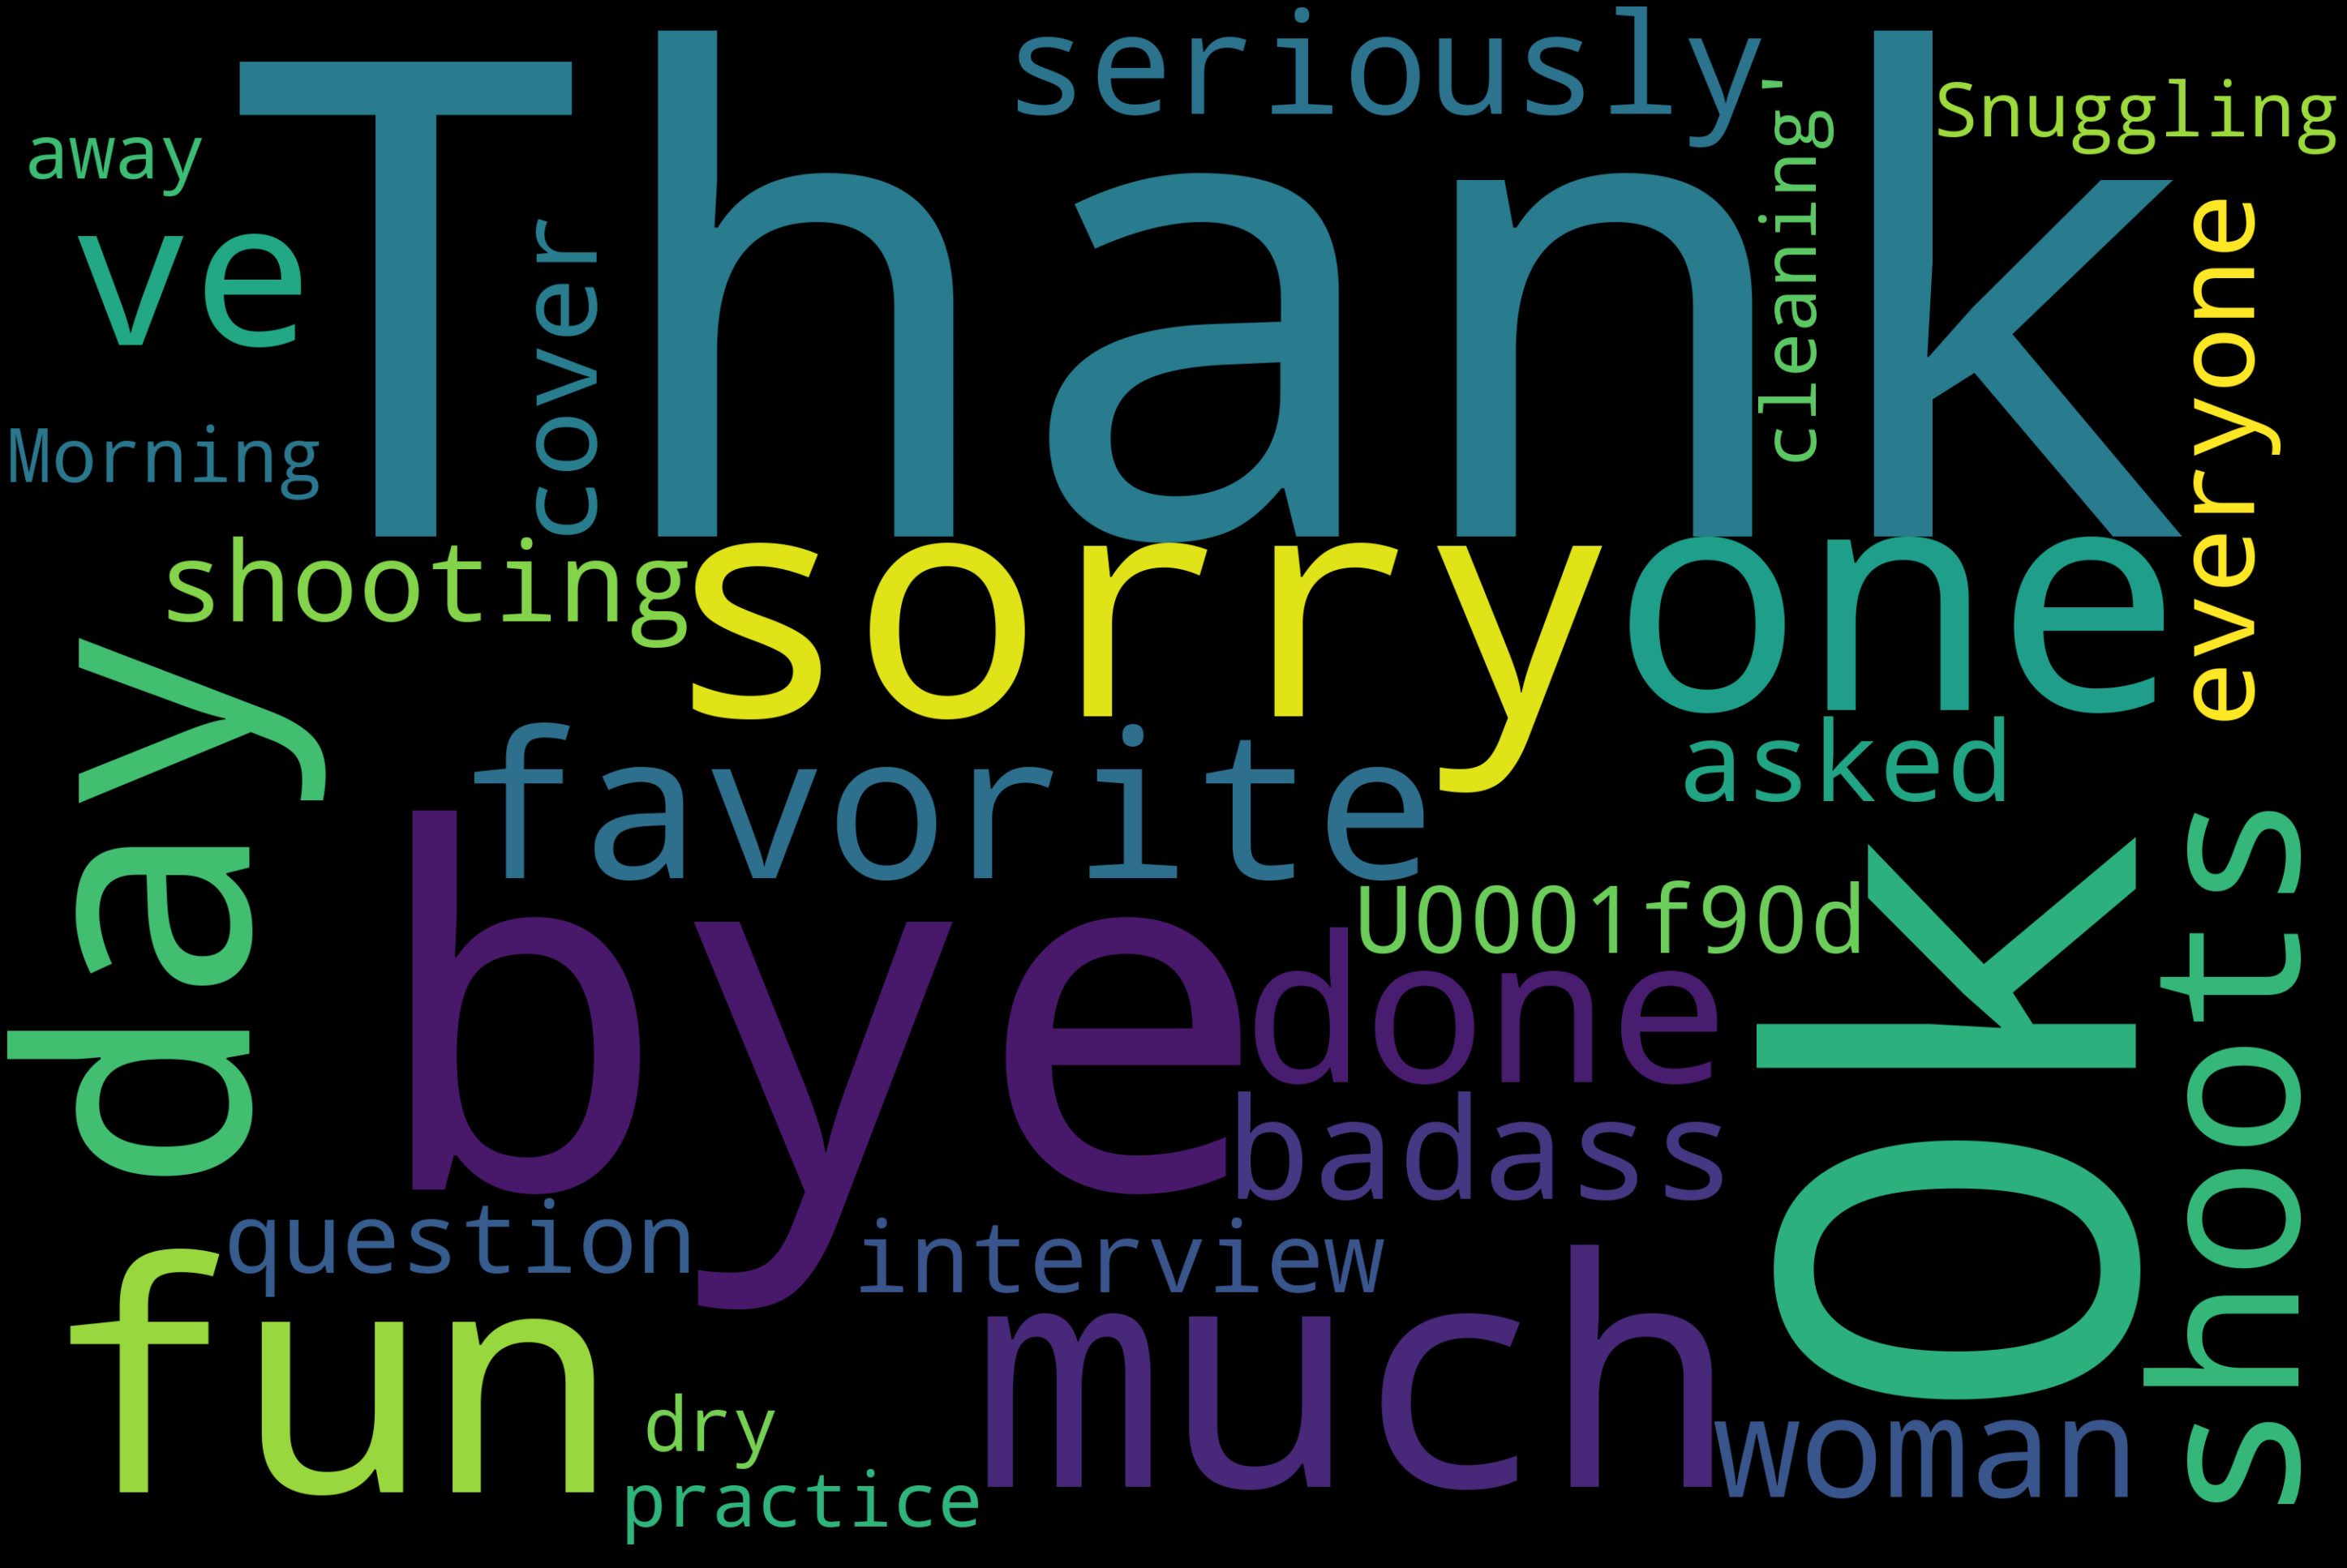

In [0]:
text = all_captions.Caption.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Note that U0001F90D is the heart Emoji.

##Model Set Up


![Model Complexity and Size: Source is from Stanford's CS231N](https://miro.medium.com/max/5250/1*n16lj3lSkz2miMc_5cvkrA.jpeg)

##Prepare image file paths and captions for CNN:

In [0]:
image_captions = all_captions['Caption'].apply(lambda x: '<start> ' + x + ' <end>').to_list()
image_paths = all_captions['Image File'].apply(lambda x: '/content/instagram_data/' + x + '.jpg').to_list()

In [0]:
image_captions[0:5]

['<start> bye  <end>',
 '<start> Ok, a few more... sorry I just had so much fun that day  <end>',
 '<start> This was one of my favorite shoots I’ve ever done! Thank you -a seriously badass woman, for shooting my cover! And thank you to everyone who asked a question for the interview \U0001f90d  <end>',
 '<start> Wrapped round my finger like a ring  <end>',
 '<start> Yesterday was so much fun!! has been such a huge figure in my life. I love her humor, her grace and her heart! Check out the interview where I’m gushing over her the whole time!  <end>']

In [0]:
image_paths[0:5]

['/content/instagram_data/img/insta2.jpg',
 '/content/instagram_data/img/insta3.jpg',
 '/content/instagram_data/img/insta4.jpg',
 '/content/instagram_data/img/insta5.jpg',
 '/content/instagram_data/img/insta6.jpg']

In [0]:
len(image_captions), len(image_paths)

(31511, 31511)

Shuffle captions and image paths together, set a random state

In [0]:
train_captions, img_name_vector = shuffle(image_captions, image_paths, random_state=1)

In [0]:
len(train_captions), len(img_name_vector)

(31511, 31511)

##Initialize CNN and Preprocess Images
Using InceptionV3, we will extract features from the last convolutional layer. We will resize the image to be 299px x 299 px and normalize the image so that the pixels are in [-1, 1]. We do this because this is the format of the images trained on InceptionV3.

In [0]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

We will perform a forward pass of each image through the network and store the resulting vector in a dictionary (image-name to feature_vector).


In [0]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
!pip install tqdm
from tqdm import tqdm

In [0]:
# Get unique images
encode_train = sorted(set(img_name_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

1970it [07:25,  4.42it/s]


##Preprocess the Captions
We will generate a vocabulary of all of the unique words in the data set by tokenizing the captions. Note that I have decided to limit the vocabulary size to the most frequent 5k words due to the limitations on Colab. In practice, it would be better to increase the vocabulary size. For all additional words, I will set an unknown token.

I will then create a word to index and index to word mapping and pad the sequences to all be the same length.



In [0]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [0]:
# Choose the top 5000 words from the vocabulary
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [0]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [0]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [0]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [0]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

##Partition Data Into Training and Testing Sets

In [0]:
# Create training and validation sets using an 80-20 split
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,
                                                                    cap_vector,
                                                                    test_size=0.2,
                                                                    random_state=0)

In [0]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(25208, 25208, 6303, 6303)

In [0]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [0]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

##Construct Model
The following model architecture is inspired by the paper Show, Attend and Tell by Xu, Ba, Kiros, et al: https://arxiv.org/pdf/1502.03044.pdf. Additionally, code in this module and some other modules originated from Daoust, Mark's Image Captioning Github repository (referened at top of notebook).

We will extract the features from a lower convolutional layer of the CNN, compress it into a shape of (64, 2048) (originally was (8, 8, 2048)). 
A forward pass is executed on this vector through the CNN Encoder. Finally, the RNN with a Gated Recurrent Unit is used to predict each next word.

In [0]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (batch_size, 64, hidden_size)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
    attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [0]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [0]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [0]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [0]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

We will create a checkpoint file to save progress.

In [0]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [0]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

##Training The Model

As previously mentioned, we will extract the features and pass them through the encoder. The output of the encoder is passed to the decoder, which is initialized with the start token. The decoder will return the predictions and hidden state, which is used in the model and the predictions are used to calculate the loss.

Note that in this training, we use teacher forcing, where the target word is passed as the next input to the decoder.

In [0]:
loss_plot = []

In [0]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [0]:
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        
        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0758
Epoch 1 Batch 100 Loss 0.0711
Epoch 1 Batch 200 Loss 0.0786
Epoch 1 Batch 300 Loss 0.0672
Epoch 1 Loss 0.075276
Time taken for 1 epoch 466.9149158000946 sec

Epoch 2 Batch 0 Loss 0.0645
Epoch 2 Batch 100 Loss 0.0714
Epoch 2 Batch 200 Loss 0.1137
Epoch 2 Batch 300 Loss 0.0808
Epoch 2 Loss 0.071708
Time taken for 1 epoch 467.3403432369232 sec

Epoch 3 Batch 0 Loss 0.0644
Epoch 3 Batch 100 Loss 0.0645
Epoch 3 Batch 200 Loss 0.0628
Epoch 3 Batch 300 Loss 0.0865
Epoch 3 Loss 0.067902
Time taken for 1 epoch 466.2330267429352 sec

Epoch 4 Batch 0 Loss 0.0584
Epoch 4 Batch 100 Loss 0.0665
Epoch 4 Batch 200 Loss 0.0630
Epoch 4 Batch 300 Loss 0.0589
Epoch 4 Loss 0.064112
Time taken for 1 epoch 466.6804015636444 sec

Epoch 5 Batch 0 Loss 0.0535
Epoch 5 Batch 100 Loss 0.0438
Epoch 5 Batch 200 Loss 0.0556
Epoch 5 Batch 300 Loss 0.0551
Epoch 5 Loss 0.060750
Time taken for 1 epoch 466.3012251853943 sec

Epoch 6 Batch 0 Loss 0.0718
Epoch 6 Batch 100 Loss 0.1032
Epoch 6 Batc

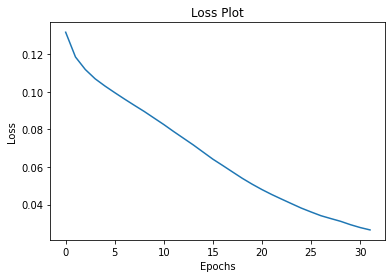

In [0]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

##Evaluation
The following evaluates a given image path and plots the attention.

In [0]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [0]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

##Analysis
The following module runs the model on a random image and prints the actual caption, the predicted caption, and the attention plots.

In [0]:
import matplotlib.image as mpimg


Real Caption: <start> matching rings with father <end>
Prediction Caption: my first time for the <unk> launching the house sister thing <unk> you tombachik <end>


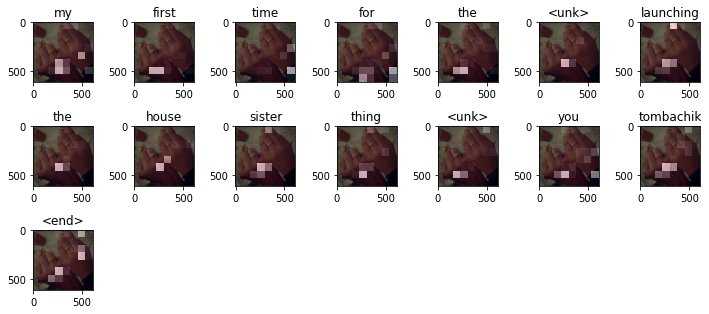

/content/instagram_data/img/insta7446.jpg


In [0]:
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)
print(image)


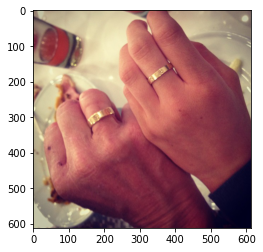

In [0]:
plt.figure()
image = mpimg.imread(image)
plt.imshow(image) 
plt.show()

##Discussion of Model Effectiveness, Conclusion, and Future Work

Please find a link for the brief discussion here: https://docs.google.com/presentation/d/16J8oW44pG7n-CusiPwQvyZusuT9xulGsvgZnto7TEAM/edit?usp=sharing.